Mean Age: 33.24, Standard Deviation: 11.76


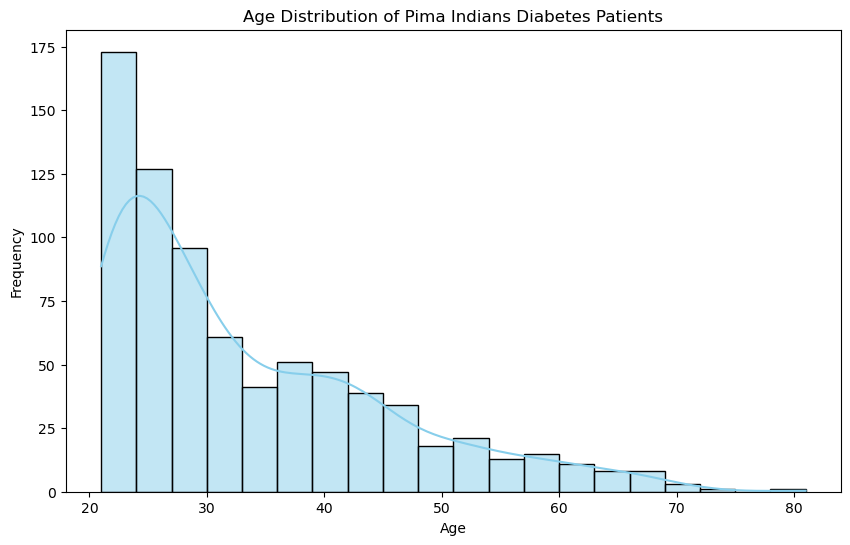


Age and BMI relationship with Outcome (Diabetes)
               Age        BMI
Outcome                      
0        31.190000  30.304200
1        37.067164  35.142537

Class Distribution (0: No Diabetes, 1: Diabetes):
0    500
1    268
Name: Outcome, dtype: int64

The dataset is imbalanced, with more instances of 'No Diabetes' (class 0).

Accuracy of Logistic Regression: 0.74


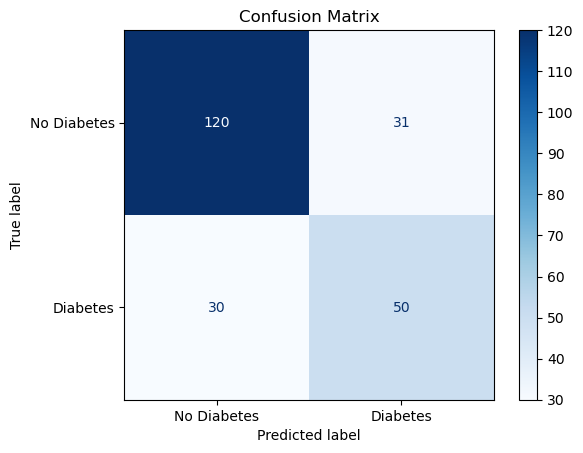

True Positive Rate: 0.62
True Negative Rate: 0.79


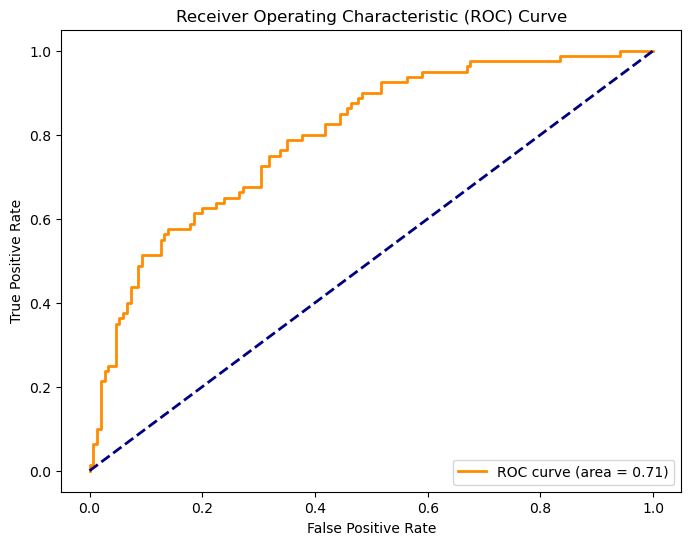

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("diabetes.csv")

column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)

# 1. Compute mean and standard deviation of the Age column
age_mean = df['Age'].mean()
age_std = df['Age'].std()
print(f"Mean Age: {age_mean:.2f}, Standard Deviation: {age_std:.2f}")

# 2. Tabulate and visualize the age of the patients
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Pima Indians Diabetes Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Analyze and tabulate the relationship of Age and BMI with respect to the class
print("\nAge and BMI relationship with Outcome (Diabetes)")
age_bmi_by_class = df.groupby('Outcome')[['Age', 'BMI']].mean()
print(age_bmi_by_class)

# 4. Check class distribution
class_counts = df['Outcome'].value_counts()
print(f"\nClass Distribution (0: No Diabetes, 1: Diabetes):\n{class_counts}")

# 5. Check if the classes are balanced
if class_counts[0] > class_counts[1]:
    print("\nThe dataset is imbalanced, with more instances of 'No Diabetes' (class 0).")
else:
    print("\nThe dataset is balanced.")

# 6. Prepare data for logistic regression
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

# 8. Predict on the test set
y_pred = log_reg_model.predict(X_test)

# 9. Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# True Positive and True Negative rates
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Positive Rate: {tp / (tp + fn):.2f}")
print(f"True Negative Rate: {tn / (tn + fp):.2f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
